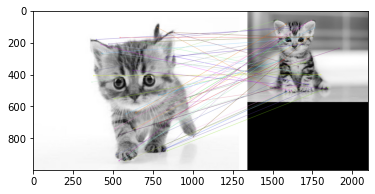

(<matplotlib.image.AxesImage at 0x7fe3050f0250>, None)

In [1]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1_ = cv2.imread('conmeo4.jpg')  
img2_ = cv2.imread('conmeo3.jpg') 

img1 = cv2.cvtColor(img1_, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2_, cv2.COLOR_BGR2GRAY)

#call sift
sift = cv2.xfeatures2d.SIFT_create()

#detect keypoints and create keypoint descriptor
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

#match descriptors of template and image
matches = bf.match(descriptors_1,descriptors_2)
#sort matches
matches = sorted(matches, key = lambda x:x.distance)

#show
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()